In [49]:
import importlib
import lane_detection

importlib.reload(lane_detection)

from lane_detection import detect_lines, draw_lines, get_slopes_intercepts, detect_lanes, draw_lanes

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
img = cv2.imread('lanes.png')

False


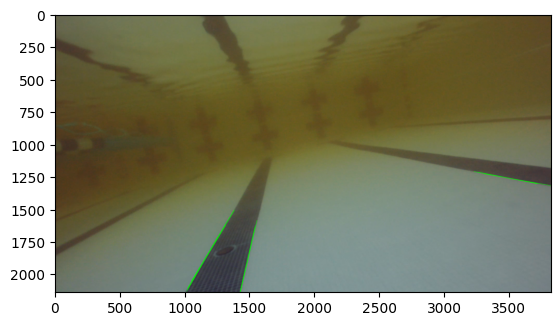

In [ ]:
lines = detect_lines(img, threshold1=30, threshold2=50, aperture_size=3, minLineLength=50, maxLineGap=30)
result = draw_lines(img, lines)
plt.imshow(result)